In [1]:
# This collection of simple stylometric scripts comes from Lee Vaughan's _Real World Python_

In [2]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [3]:
LINES = ['-', ':', '--']  # Line style for plots.

In [4]:
def main():
    # Load text files into dictionary by author.
    strings_by_author = dict()
    strings_by_author['doyle'] = text_to_string('hound.txt')
    strings_by_author['wells'] = text_to_string('war.txt')
    strings_by_author['unknown'] = text_to_string('lost.txt')

    # Check results of reading files.
    print(strings_by_author['doyle'][:300])

    # Tokenize text strings and run stylometric tests.
    words_by_author = make_word_dict(strings_by_author)
    len_shortest_corpus = find_shortest_corpus(words_by_author)
    
    word_length_test(words_by_author, len_shortest_corpus)
    stopwords_test(words_by_author, len_shortest_corpus)
    parts_of_speech_test(words_by_author, len_shortest_corpus)
    vocab_test(words_by_author)
    jaccard_test(words_by_author, len_shortest_corpus)

In [5]:
def text_to_string(filename):
    """Read a text file and return a string."""
    with open(filename) as infile:
        return infile.read()

In [6]:
def make_word_dict(strings_by_author):
    """Return dictionary of tokenized words by corpus by author."""
    words_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = ([token.lower() for token in tokens
                                    if token.isalpha()])
    return words_by_author

In [7]:
def find_shortest_corpus(words_by_author):
    """Return length of shortest corpus."""
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print('\nNumber of words for {} = {}\n'.
              format(author, len(words_by_author[author])))
    len_shortest_corpus = min(word_count)
    print('length shortest corpus = {}\n'.format(len_shortest_corpus))        
    return len_shortest_corpus    

In [8]:
def word_length_test(words_by_author, len_shortest_corpus):
    """Plot word length freq by author, truncated to shortest corpus length."""
    by_author_length_freq_dist = dict()
    plt.figure(1)    
    plt.ion()
    for i, author in enumerate(words_by_author):
        print(author) # test to see if author variable works. It does. Why doesn't it carry over to the label in .plot then?
        word_lengths = [len(word) for word in words_by_author[author]
                        [:len_shortest_corpus]]
        by_author_length_freq_dist[author] = nltk.FreqDist(word_lengths)
        by_author_length_freq_dist[author].plot(15,
                                                linestyle=LINES[i],
                                                label=author,
                                                title='Word Length')
    plt.legend()
    plt.show()

In [9]:
def stopwords_test(words_by_author, len_shortest_corpus):
    """Plot stopwords freq by author, truncated to shortest corpus length."""
    stopwords_by_author_freq_dist = dict()
    plt.figure(2) 
    stop_words = set(stopwords.words('english'))  # Use set for speed.
    #print('Number of stopwords = {}\n'.format(len(stop_words)))
    #print('Stopwords = {}\n'.format(stop_words))
    for i, author in enumerate(words_by_author):
        stopwords_by_author = [word for word in words_by_author[author]
                               [:len_shortest_corpus] if word in stop_words]    
        stopwords_by_author_freq_dist[author] = nltk.FreqDist(stopwords_by_author)    
        stopwords_by_author_freq_dist[author].plot(50,
                                                   label=author,
                                                   linestyle=LINES[i],
                                                   title=
                                                   '50 Most Common Stopwords')
        
    plt.legend()
    plt.show() 

In [10]:
def parts_of_speech_test(words_by_author, len_shortest_corpus):
    """Plot author use of parts-of-speech such as nouns, verbs, adverbs,etc."""
    by_author_pos_freq_dist = dict()
    plt.figure(3)
    for i, author in enumerate(words_by_author):
        pos_by_author = [pos[1] for pos in nltk.pos_tag(words_by_author[author]
                                                        [:len_shortest_corpus])] 
        by_author_pos_freq_dist[author] = nltk.FreqDist(pos_by_author)
        by_author_pos_freq_dist[author].plot(35,
                                             label=author,
                                             linestyle=LINES[i],
                                             title='Part of Speech')
    plt.legend()
    plt.show(block=True)

In [11]:
def vocab_test(words_by_author):
    """Compare author vocabularies using the Chi Squared statistical test."""
    chisquared_by_author = dict()
    for author in words_by_author:
        if author != 'unknown': 
            # Combine corpus for author & unknown & find 1000 most-common words.
            combined_corpus = (words_by_author[author] +
                               words_by_author['unknown'])
            author_proportion = (len(words_by_author[author])/
                                 len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))
            chisquared = 0

            # Calculate observed vs. expected word counts.
            for word, combined_count in most_common_words:
                observed_count_author = words_by_author[author].count(word)
                expected_count_author = combined_count * author_proportion
                chisquared += ((observed_count_author -
                                expected_count_author)**2 /
                               expected_count_author)
                chisquared_by_author[author] = chisquared    
            print('Chi-squared for {} = {:.1f}'.format(author, chisquared))
            

    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print('Most-likely author by vocabulary is {}\n'.format(most_likely_author))

In [12]:
def jaccard_test(words_by_author, len_shortest_corpus):
    """Calculate Jaccard similarity of each known corpus to unknown corpus."""
    jaccard_by_author = dict()
    unique_words_unknown = set(words_by_author['unknown']
                               [:len_shortest_corpus])
    authors = (author for author in words_by_author if author != 'unknown')    
    for author in authors:
        unique_words_author = set(words_by_author[author][:len_shortest_corpus]) 
        shared_words = unique_words_author.intersection(unique_words_unknown)
        jaccard_sim = (float(len(shared_words))/ (len(unique_words_author) +
                                                  len(unique_words_unknown) -
                                                  len(shared_words)))
        jaccard_by_author[author] = jaccard_sim
        print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))
        
    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print('Most-likely author by similarity is {}'.format(most_likely_author))





THE HOUND OF THE BASKERVILLES

Another Adventure of Sherlock Holmes


by A. Conan Doyle




My dear Robinson,


    It was to your account of a West-Country legend that this tale owes its
inception. For this and for your help in the details all thanks.



Yours most truly,        

A. Conan Doyl

Number of words for doyle = 58440


Number of words for wells = 59151


Number of words for unknown = 75104

length shortest corpus = 58440

doyle


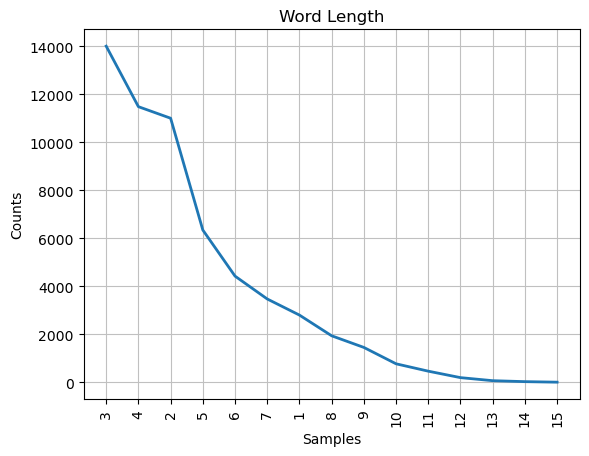

wells


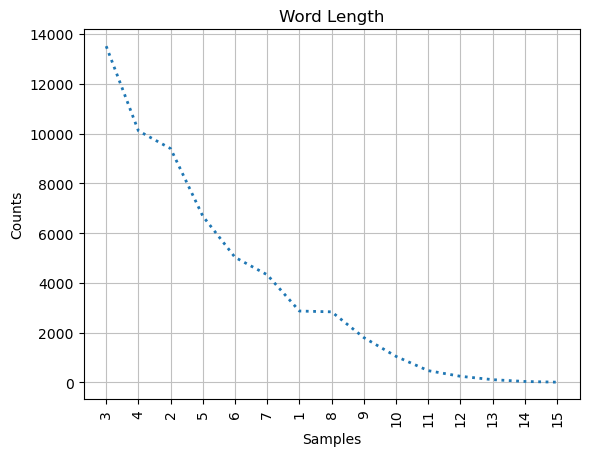

unknown


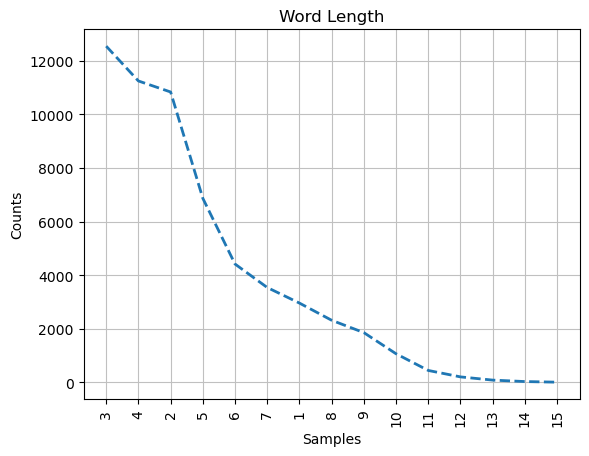

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


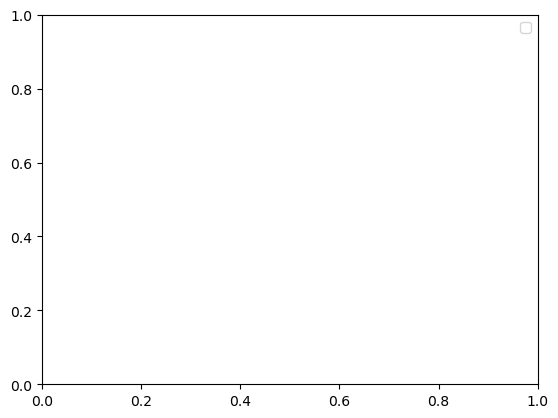

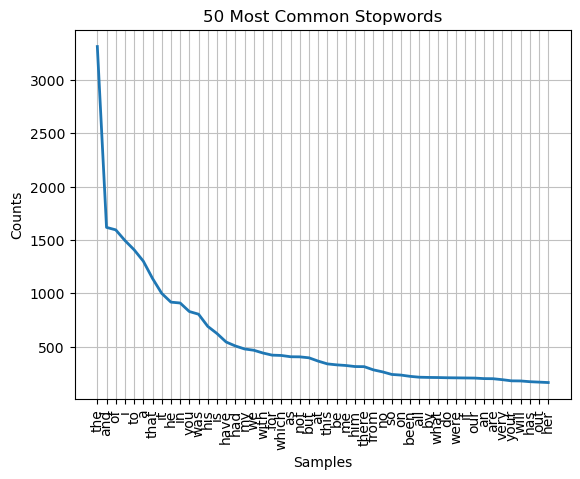

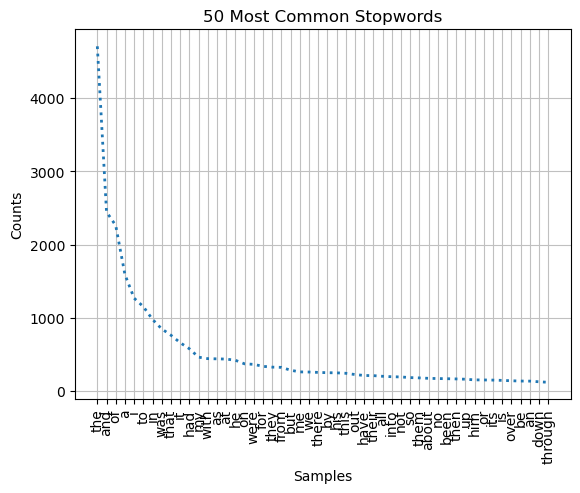

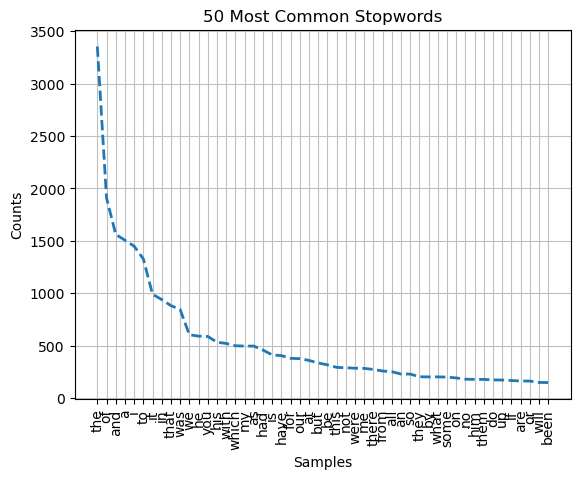

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


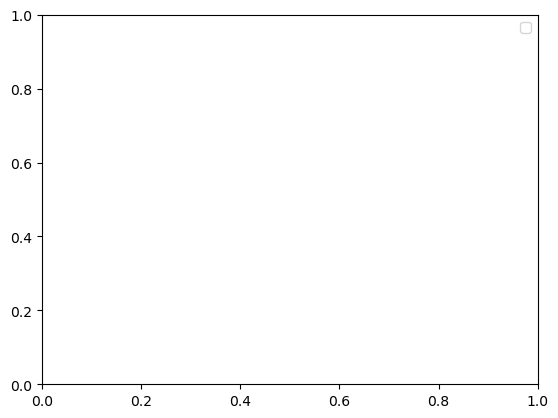

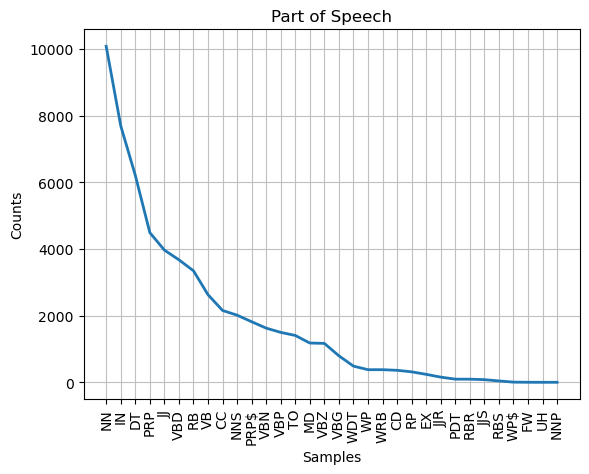

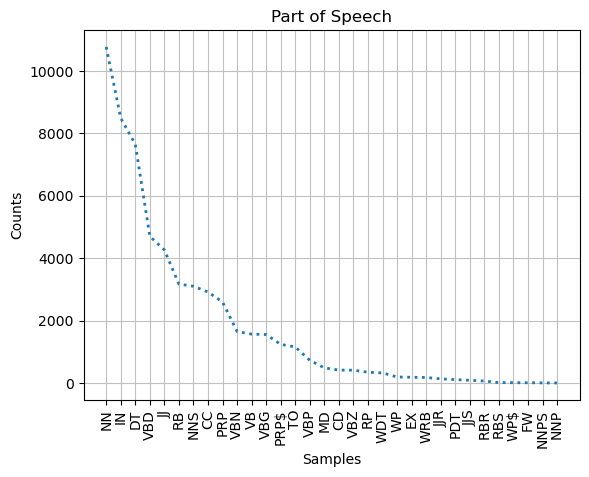

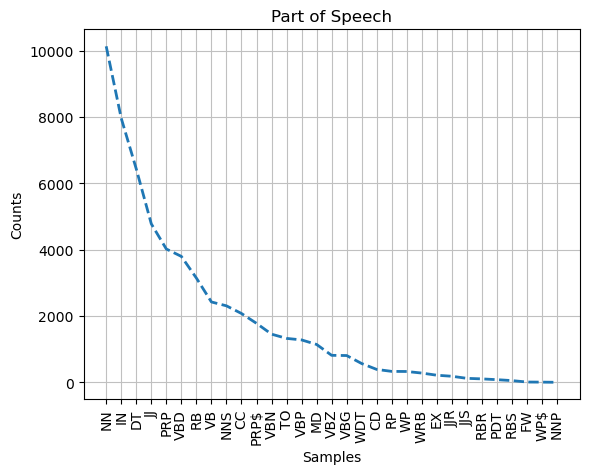

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


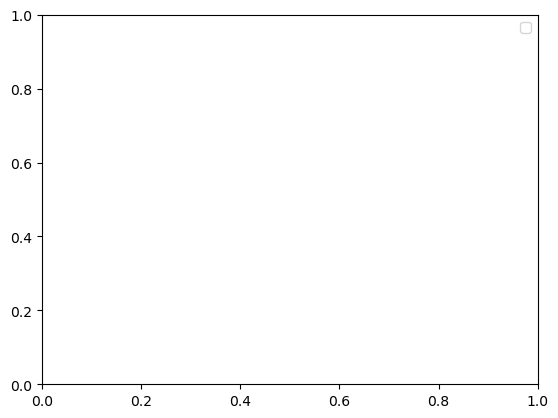

Chi-squared for doyle = 4599.5
Chi-squared for wells = 6639.7
Most-likely author by vocabulary is doyle

Jaccard Similarity for doyle = 0.34758636210194666
Jaccard Similarity for wells = 0.3105447276361819
Most-likely author by similarity is doyle


In [13]:
if __name__ == '__main__':
    main()